<a href="https://colab.research.google.com/github/IBeliveInMagic/Covid_Dados/blob/main/LSTM_Covid_Data_Obitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importações**

In [338]:
import requests
import csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# **Carregando os dados**

In [339]:
!gdown 'https://drive.google.com/uc?id=1Zi5iwuWt0fsH0uVOiyWZHctUX0pV_De7'

Downloading...
From: https://drive.google.com/uc?id=1Zi5iwuWt0fsH0uVOiyWZHctUX0pV_De7
To: /content/R_GO.csv
100% 861/861 [00:00<00:00, 1.62MB/s]


# **Preparando os dados**

In [340]:
DF = pd.read_csv('/content/R_GO.csv',sep=',')

In [341]:
DF

,Unnamed: 0,saidaConfirmadaObitos,casosNovos
0,Janeiro 2020,0.0,0.0
1,Fevereiro 2020,0.0,0.0
2,Março 2020,2.0,130.0
3,Abril 2020,56.0,1432.0
4,Maio 2020,190.0,5842.0
5,Junho 2020,700.0,41358.0
6,Julho 2020,2364.0,87120.0
7,Agosto 2020,2876.0,129130.0
8,Setembro 2020,3156.0,153810.0
9,Outubro 2020,2162.0,92072.0


In [352]:
# Dividindo o dataframe em recursos e alvos
features = DF[['casosNovos']]
target = DF['saidaConfirmadaObitos']

# Normalizando os dados de recursos
features = (features - features.mean()) / features.std()

X = DF['saidaConfirmadaObitos'].values
X = (X - np.min(X)) / (np.max(X) - np.min(X))

# Convertendo os dados em arrays numpy
features = np.array(features)
target = np.array(X)

# Dividindo os dados em treino e teste
n = len(features)
x_train = features[:int(0.8*n),:]
y_train = target[:int(0.8*n)]
x_test = features[int(0.8*n):,:]
y_test = target[int(0.8*n):]

# Reshape dos dados para entrada no modelo
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Criando o modelo
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='RMSprop', loss='mean_squared_logarithmic_error')

# Treinando o modelo
model.fit(x_train, y_train, epochs=50, batch_size=50, verbose=1)

# Fazendo previsões
y_pred = model.predict(x_test)

# Avaliando o modelo
score = model.evaluate(x_test, y_test, verbose=0)
print("Perda do teste:", score)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.0860
Epoch 2/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0815
Epoch 3/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0767
Epoch 4/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0731
Epoch 5/50
1/1 [==============================] - 0s 22ms/step - loss: 0.0701
Epoch 6/50
1/1 [==============================] - 0s 18ms/step - loss: 0.0682
Epoch 7/50
1/1 [==============================] - 0s 21ms/step - loss: 0.0653
Epoch 8/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0645
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0626
Epoch 10/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0600
Epoch 11/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0586
Epoch 12/50
1/1 [==============================] - 0s 23ms/step - loss: 0.0566
Epoch 13/50
1/1 [==============================] - 0s 23ms/step

In [343]:
X = DF['saidaConfirmadaObitos'].values
X = (X - np.min(X)) / (np.max(X) - np.min(X))

In [344]:
#X

# **Modelo LSTM**

In [345]:
# Conjunto de pontos passados para o modelo LSTM
window = 10

n = DF.shape[0]

# Separar os dados em 80% treino e 20% teste
last = int(n/5.0)
Xtrain = X[:-last]
Xtest = X[-last-window:]

# Armarzenar window números de pontos em uma sequência
xin = []
next_X = []
for i in range(window,len(Xtrain)):
    xin.append(Xtrain[i-window:i])
    next_X.append(Xtrain[i])

# Transformar os dados para o formato LSTM
xin, next_X = np.array(xin), np.array(next_X)
xin = xin.reshape(xin.shape[0], xin.shape[1], 1)
#print(xin[0:5])

Esse código cria um modelo Sequential de Rede Neural Artificial com duas camadas LSTM, com 50 unidades cada, seguidas por duas camadas de Dropout (com taxa de descarte de 0,2), e finalmente, uma camada densa com uma unidade. A função de perda utilizada é a "mean_squared_error" e o otimizador escolhido é o "adam". A forma da entrada da camada LSTM é definida como uma matriz tridimensional de formato (xin.shape[1], 1), onde xin.shape[1] representa o comprimento da janela de tempo.

In [346]:
# Keras é uma interface do TensorFlow
import tensorflow as tf
from sklearn.metrics import r2_score
from keras import regularizers
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from keras.layers import Dropout

# Inicializar modelo LSTM

m = Sequential()
m.add(LSTM(units=50, return_sequences=True, input_shape=(xin.shape[1],1)))
m.add(Dropout(0.2))
m.add(LSTM(units=50))
m.add(Dropout(0.2))
m.add(Dense(units=1))
m.compile(optimizer='RMSprop', loss='mean_squared_logarithmic_error')



*   Mean Squared Error (MSE): A função MSE calcula a média dos erros ao quadrado entre as previsões e os valores reais. É amplamente utilizada em problemas de regressão.
*   Mean Squared Logarithmic Error (MSLE): A MSLE é semelhante à MSE, mas aplica a logaritmo aos erros antes de calcular a média. Isso é útil para problemas onde as diferenças entre as previsões e os valores reais são grandes.





* Adam: um otimizador baseado em gradiente que utiliza técnicas de adaptação de taxa de aprendizado
*  RMSprop: um otimizador baseado em gradiente que se concentra na descida de gradiente em direção às direções de descida de gradiente mais rápidas



Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 0.1049
Epoch 2/50
1/1 [==============================] - 0s 29ms/step - loss: 0.0948
Epoch 3/50
1/1 [==============================] - 0s 33ms/step - loss: 0.0580
Epoch 4/50
1/1 [==============================] - 0s 31ms/step - loss: 0.0438
Epoch 5/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0413
Epoch 6/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0420
Epoch 7/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0384
Epoch 8/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0397
Epoch 9/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0414
Epoch 10/50
1/1 [==============================] - 0s 25ms/step - loss: 0.0411
Epoch 11/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0367
Epoch 12/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0371
Epoch 13/50
1/1 [==============================] - 0s 24ms/step

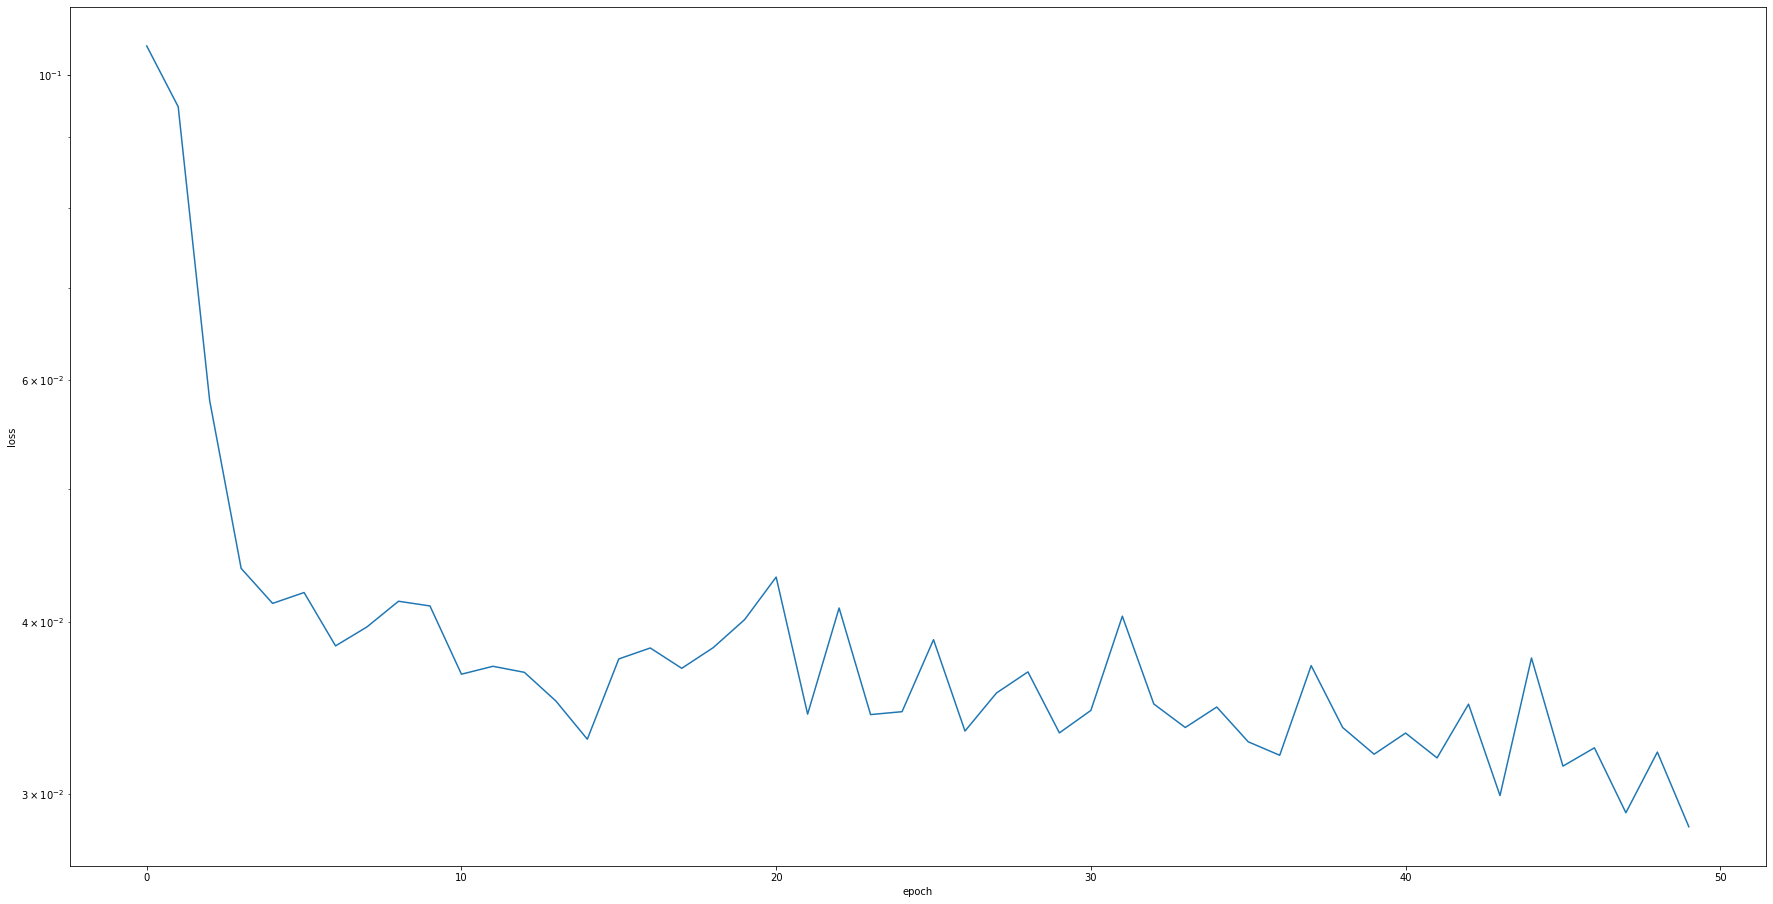

In [347]:
# Modelo LSTM fit
history = m.fit(xin, next_X, epochs = 50, batch_size = 50, verbose = 1)

plt.figure(figsize=(30.4,15.8))
plt.ylabel('loss'); plt.xlabel('epoch')
plt.semilogy(history.history['loss'])

# **Validação**

1/1 [==============================] - 1s 912ms/step
-72.67327595926406


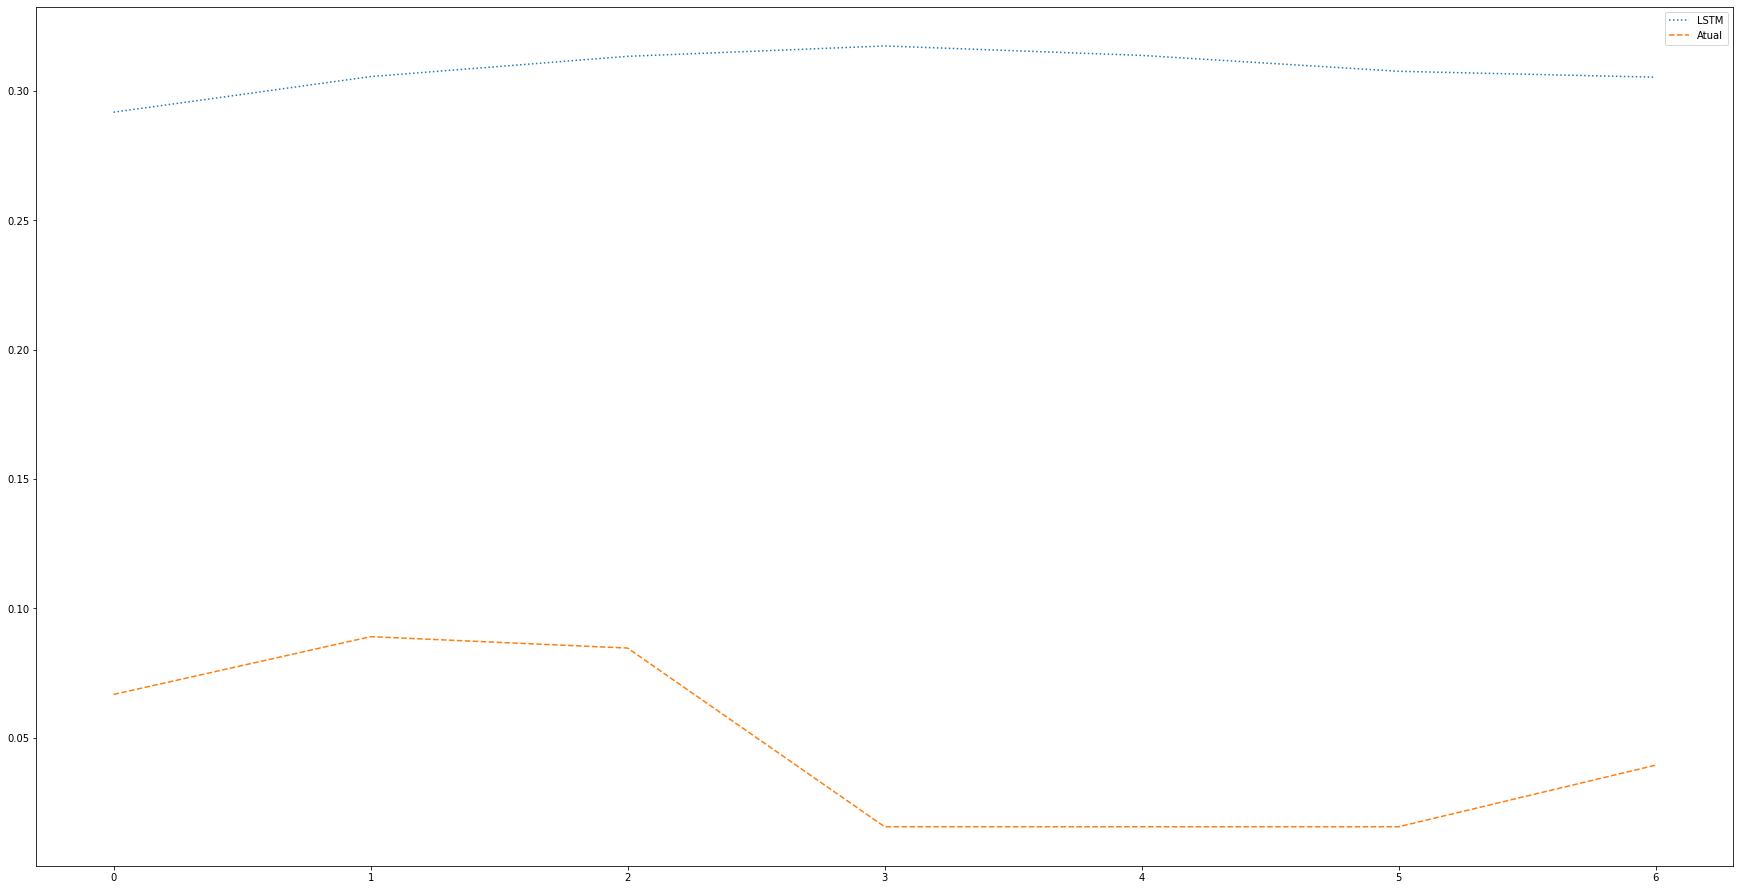

In [348]:
# Armazenar "window" pontos em uma sequência
xin = []
next_x1 = []

for i in range(window, len(Xtest)):
  xin.append(Xtest[i-window:i])
  next_x1.append(Xtest[i])

# Transformar os dados para o formato LSTM
xin, next_x1 = np.array(xin), np.array(next_x1)
xin = xin.reshape((xin.shape[0], xin.shape[1], 1))

# Predizer o próximo valor (1 passo a frente)
X_pred = m.predict(xin)

r2 = r2_score(next_x1, X_pred)
print(r2)

# Mostrar predição VS dados de teste atual
plt.figure(figsize=(30.4,15.8))
plt.plot(X_pred, ':', label = 'LSTM')
plt.plot(next_x1, '--', label='Atual')
plt.legend()

# **Forecasting**

Verificar o score R². Se o score R² for muito alto nos dados de treinamento, mas muito baixo nos dados de validação, é provável que o modelo esteja sofrendo de overfitting.

1/1 [==============================] - 0s 29ms/step
-90.98786462129439


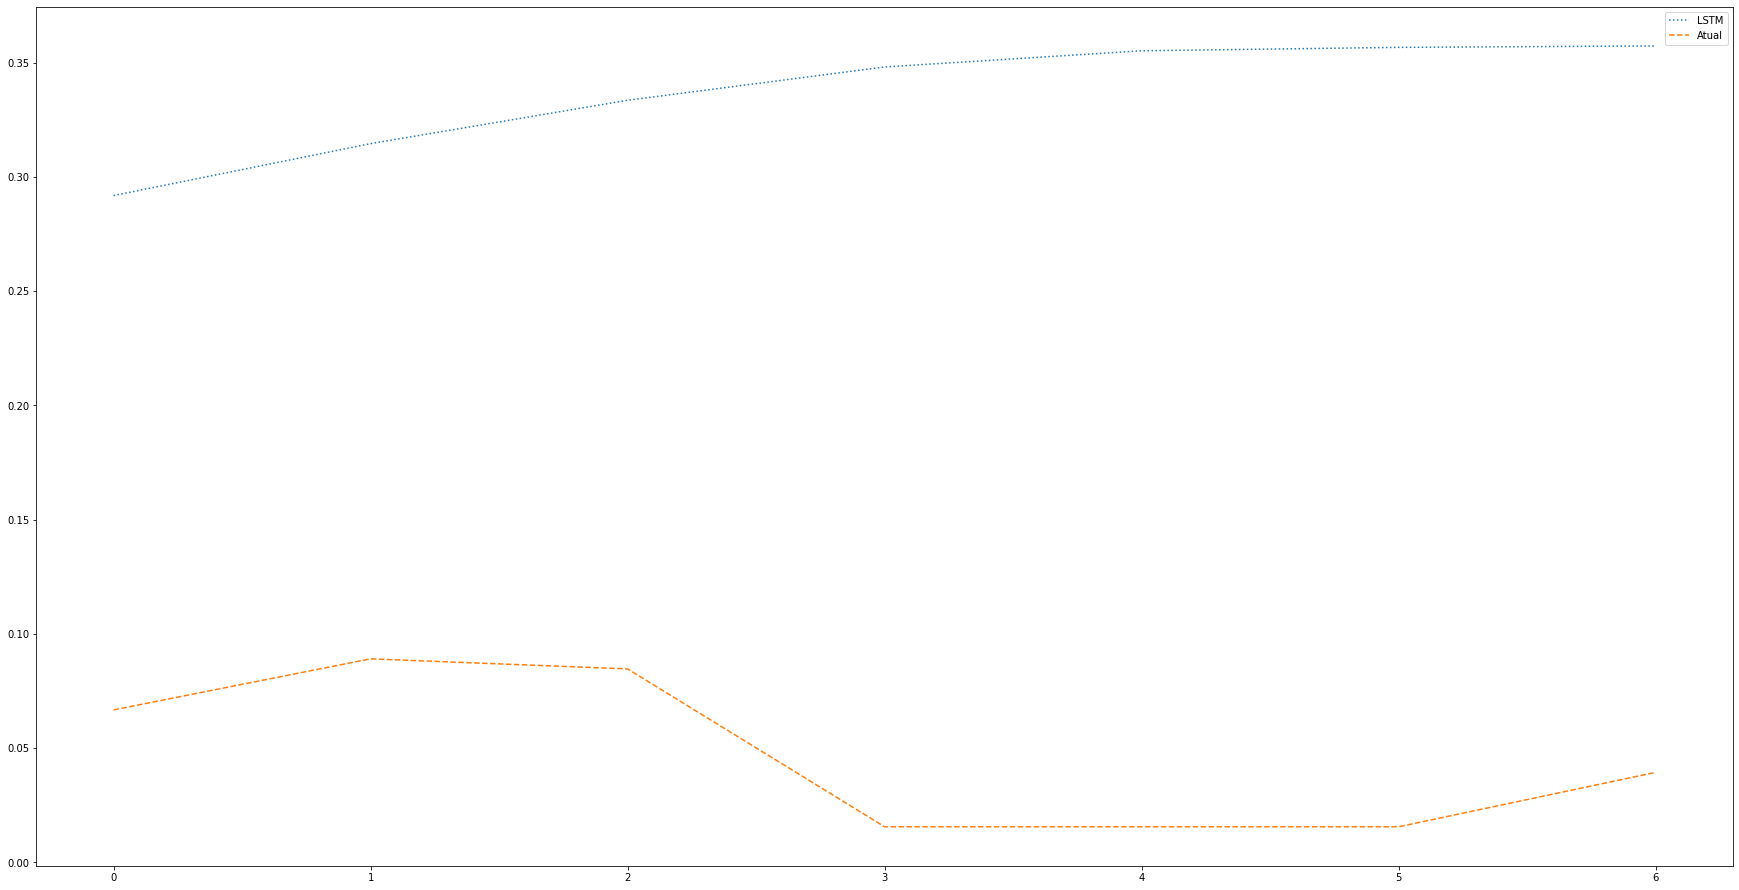

In [349]:
# Usando valores preditivos para predizer o próximo passo

X_pred = Xtest.copy()
for i in range(window, len(X_pred)):
  xin = X_pred[i-window:i].reshape((1, window, 1))
  X_pred[i] = m.predict(xin)

r2 = r2_score(next_x1, X_pred[window:])
print(r2)

# Mostrar predição VS dados do teste atual
plt.figure(figsize=(30.4,15.8))
plt.plot(X_pred[window:], ':', label='LSTM')
plt.plot(next_x1, '--', label='Atual')
plt.legend()